In [1]:
from ML2020 import *
import warnings
warnings.filterwarnings("ignore")

###  1. Data Cleaning

In [2]:
raw_data = pd.read_csv("data/constituents_2013_fund_tech.csv")

In [3]:
raw_data.head()

,Unnamed: 0,permno,gvkey,fyear,sic2,spi,mve_f,bm,ep,cashpr,...,TRIMA,TRIX,TYPPRICE,ULTOSC,Volume,WCLPRICE,WILLR,WMA,lagClose,ret
0,0,79411.0,28648,2012.0,b'59',NaN,6889.63530,0.163084,0.056538,11.502685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,11081.0,14489,2012.0,b'35',NaN,23011.12000,0.464123,0.103081,-1.509500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,16678.0,6502,2012.0,b'54',NaN,14237.80000,0.295481,0.105143,-3.578541,...,NaN,NaN,21.068333,NaN,132791600.0,21.15625,NaN,NaN,20.170,0.061973
3,3,18403.0,8446,2012.0,b'53',NaN,4458.36900,0.711247,-0.220933,-2.544765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,40539.0,11672,2012.0,b'56',NaN,32705.89236,0.112088,0.058298,11.704499,...,NaN,NaN,29.405000,NaN,126245200.0,29.65250,NaN,NaN,28.195,0.078028


In [4]:
ML_object = MLEngineer(raw_data, num_stocks=40,
                       trading_window = 12, algorithm='SVM', small_sample = False, method='median')
ML_object.data_processing()

date format corrected
missing indicator variables deleted
continous variables containing infinity deleted
missing continuous variables filled in with median


In [5]:
ML_object.clean_data.head()

,Unnamed: 0,gvkey,permno,fyear,spi,mve_f,bm,ep,cashpr,dy,...,TRIMA,TYPPRICE,ULTOSC,Volume,WCLPRICE,WILLR,WMA,lagClose,ret,DATE
0,0,28648,79411.0,2012.0,-0.002863,6889.63530,0.163084,0.056538,11.502685,0.009955,...,60.24725,61.469999,55.736725,55489800.0,61.56250,-35.50184,61.692925,61.560001,0.006817,2013-09
1,1,14489,11081.0,2012.0,-0.002863,23011.12000,0.464123,0.103081,-1.509500,0.012081,...,60.24725,61.469999,55.736725,55489800.0,61.56250,-35.50184,61.692925,61.560001,0.006817,2013-10
2,2,6502,16678.0,2012.0,-0.002863,14237.80000,0.295481,0.105143,-3.578541,0.019736,...,60.24725,21.068333,55.736725,132791600.0,21.15625,-35.50184,61.692925,20.170000,0.061973,2013-10
3,3,8446,18403.0,2012.0,-0.002863,4458.36900,0.711247,-0.220933,-2.544765,0.010542,...,60.24725,61.469999,55.736725,55489800.0,61.56250,-35.50184,61.692925,61.560001,0.006817,2013-10
4,4,11672,40539.0,2012.0,-0.002863,32705.89236,0.112088,0.058298,11.704499,0.010280,...,60.24725,29.405000,55.736725,126245200.0,29.65250,-35.50184,61.692925,28.195000,0.078028,2013-10


###  2. Return Prediction

In [6]:
time_list =['2014-10-01', '2018-11-01']
returns_long = ML_object.profit_construct(time_list, strategy ='long_equal_weighted')

2014-10
2014-11
2014-12
2015-01
2015-02
2015-03
2015-04
2015-05
2015-06
2015-07
2015-08
2015-09
2015-10
2015-11
2015-12
2016-01
2016-02
2016-03
2016-04
2016-05
2016-06
2016-07
2016-08
2016-09
2016-10
2016-11
2016-12
2017-01
2017-02
2017-03
2017-04
2017-05
2017-06
2017-07
2017-08
2017-09
2017-10
2017-11
2017-12
2018-01
2018-02
2018-03
2018-04
2018-05
2018-06
2018-07
2018-08
2018-09
2018-10
2018-11


In [7]:
returns_short = - np.array(ML_object.profit_construct(time_list, strategy ='short_equal_weighted'))


2014-10
2014-11
2014-12
2015-01
2015-02
2015-03
2015-04
2015-05
2015-06
2015-07
2015-08
2015-09
2015-10
2015-11
2015-12
2016-01
2016-02
2016-03
2016-04
2016-05
2016-06
2016-07
2016-08
2016-09
2016-10
2016-11
2016-12
2017-01
2017-02
2017-03
2017-04
2017-05
2017-06
2017-07
2017-08
2017-09
2017-10
2017-11
2017-12
2018-01
2018-02
2018-03
2018-04
2018-05
2018-06
2018-07
2018-08
2018-09
2018-10
2018-11


### 3. Return Plot

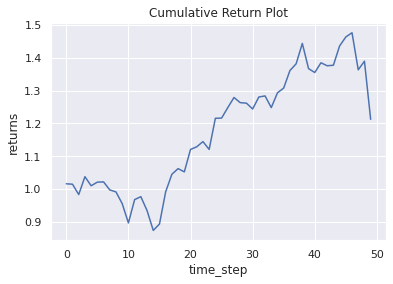

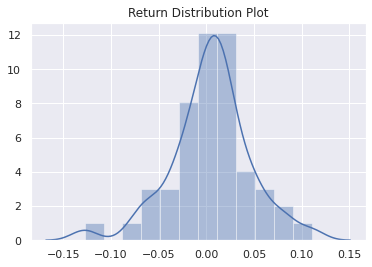

In [8]:
ML_object.return_plot(returns_long)

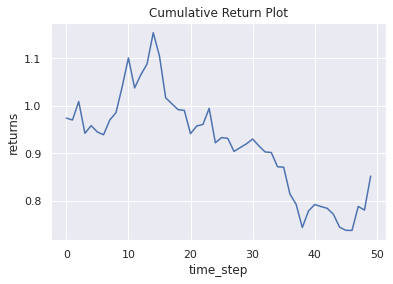

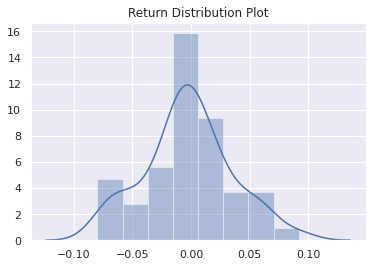

In [9]:
ML_object.return_plot(returns_short)